In [0]:
#Load MNIST dataset
# MNIST dataset has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

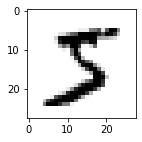

Label: 5


In [4]:
#Show some images in the dataset.
import matplotlib.pyplot as plt

image = mnist.data[0].reshape((28,28))
label =  mnist.target[0]

plt.figure(figsize = (15,2))
imgplot = plt.imshow(image,cmap=plt.cm.binary)
plt.show()
print("Label:",label)

In [0]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_normalized_img = scaler.transform(train_img)
test_normalized_img = scaler.transform(test_img)

In [0]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
train_img = pca.fit_transform(train_normalized_img)
test_img = pca.fit_transform(test_normalized_img)

train_normalized_img = pd.DataFrame(data = train_img)
test_normalized_img = pd.DataFrame(data = test_img)


In [0]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(train_normalized_img, train_lbl)

#Evaluate our model. The result is the accuracy metric
clf.score(test_normalized_img, test_lbl)

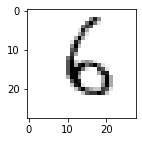

In [7]:
#Get one image from test set
img = test_img[35] #(784)

#Convert to 28,28 for visualization
img = img.reshape(28,28)
plt.figure(figsize = (15,2))
imgplot = plt.imshow(img,cmap=plt.cm.binary)
plt.show()

In [0]:
img = img.reshape(784)
img_normalized = scaler.transform([img])
img_normalized.shape

(1, 784)

In [0]:
results = clf.predict(img_normalized)
results

array(['6'], dtype=object)

In [0]:
results[0]

'6'